In [1]:
# Brent Crude Oil Price Analysis
### This project analyzes historical Brent crude oil price trends (1987-2022) using the Kaggle Brent Oil Prices dataset.

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [233]:
df= pd.read_csv("BrentOilPrices.csv")
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [235]:
df.tail()

,Date,Price
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37
9010,"Nov 14, 2022",93.59


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [203]:
df.columns

Index(['Date', 'Price'], dtype='object')

In [205]:
df[['Price']].describe()

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


In [241]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB


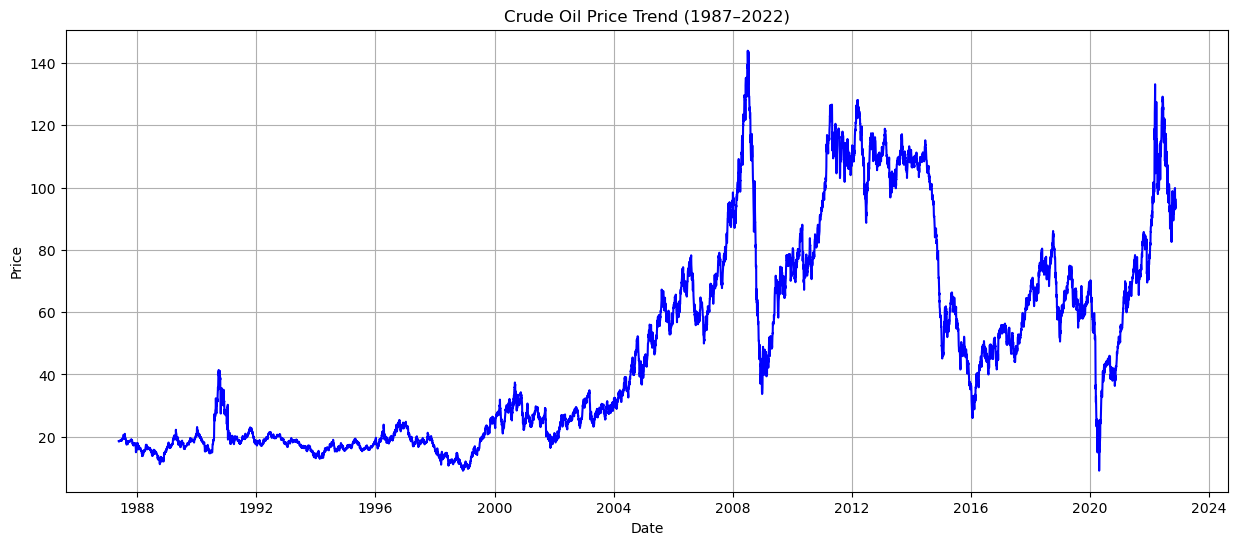

In [295]:

plt.figure(figsize=(15,6))
plt.plot(df['Date'], df['Price'], color='blue')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Brent Crude Oil Price Trend (1987–2022)")
plt.grid(True)
plt.savefig("Crude_Oil_Price_Trend_(1987–2022).png",format='png',dpi=300,bbox_inches='tight')
plt.show()



In [259]:
maxid = df['Price'].idxmax()
minid = df['Price'].idxmin()
print("highest price: $",df.iloc[maxid,1],"in",df.iloc[maxid,0])
print("lowest price: $",df.iloc[minid,1],"in",df.iloc[minid,0])

highest price: $ 143.95 in 2008-07-03 00:00:00
lowest price: $ 9.1 in 1998-12-10 00:00:00


In [261]:
df['Year']=df['Date'].dt.year
df1=df.groupby('Year')['Price'].mean().reset_index()
df1.head()

,Year,Price
0,1987,18.525813
1,1988,14.905412
2,1989,18.228228
3,1990,23.761445
4,1991,20.041128


In [265]:
df1[['Price']].describe()

,Price
count,36.000000
mean,48.424812
std,32.508184
min,12.758103
25%,19.266923
50%,40.180355
75%,70.975252
max,111.570683


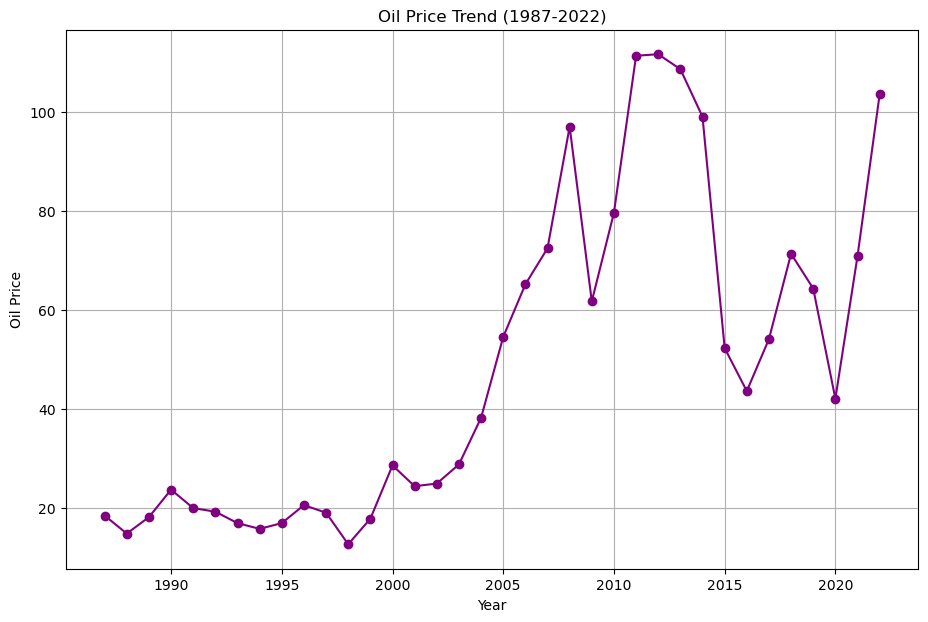

In [297]:
plt.figure(figsize=(11,7))
plt.xlabel("Year")
plt.ylabel("Oil Price")
plt.title("Oil Price Trend (1987-2022)")
plt.plot(df1['Year'],df1['Price'],marker='o',color='purple')
plt.grid(True)
plt.savefig("Oil_Price_Trend_(1987-2022).png",format='png',dpi=300,bbox_inches='tight')
plt.show()

In [255]:
df['Decade']=(df['Year']//10)*10
Decade_avg= df.groupby("Decade")["Price"].mean()
print(Decade_avg)

Decade
1980    17.032855
1990    18.353844
2000    49.461439
2010    79.346369
2020    70.602634
Name: Price, dtype: float64


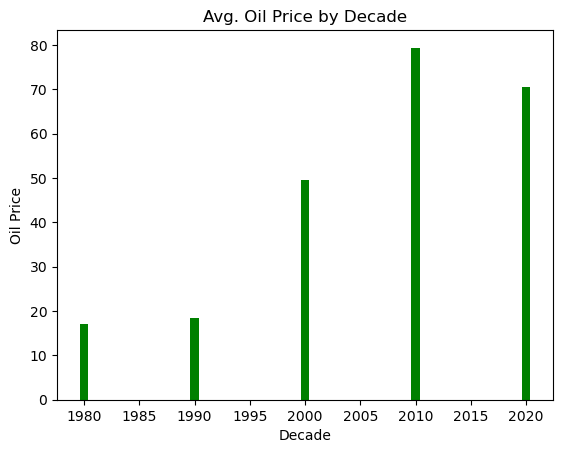

In [299]:
plt.xlabel("Decade")
plt.ylabel("Oil Price")
plt.title("Avg. Oil Price by Decade")
plt.bar(Decade_avg.index,Decade_avg.values,color='green')
plt.savefig("Avg_Oil_Price_by_Decade.png",format='png',dpi=300,bbox_inches='tight')
plt.show()

In [269]:
df1['Price_Change'] = df1['Price'].diff()
df1['Price_Changepct'] = df1['Price'].pct_change() * 100

print(df1[['Year', 'Price', 'Price_Change', 'Price_Changepct']].head(10))

   Year      Price  Price_Change  Price_Changepct
0  1987  18.525813           NaN              NaN
1  1988  14.905412     -3.620401       -19.542467
2  1989  18.228228      3.322817        22.292686
3  1990  23.761445      5.533217        30.355210
4  1991  20.041128     -3.720317       -15.656947
5  1992  19.319728     -0.721401        -3.599602
6  1993  17.013413     -2.306315       -11.937616
7  1994  15.856389     -1.157024        -6.800657
8  1995  17.015850      1.159461         7.312263
9  1996  20.639803      3.623953        21.297516


In [271]:
df1.head()

,Year,Price,Price_Change,Price_Changepct
0,1987,18.525813,NaN,NaN
1,1988,14.905412,-3.620401,-19.542467
2,1989,18.228228,3.322817,22.292686
3,1990,23.761445,5.533217,30.355210
4,1991,20.041128,-3.720317,-15.656947


In [273]:
df1.tail()

,Year,Price,Price_Change,Price_Changepct
31,2018,71.335000,17.210195,31.797242
32,2019,64.319845,-7.015155,-9.834100
33,2020,42.101016,-22.218829,-34.544283
34,2021,70.855336,28.754320,68.298401
35,2022,103.477545,32.622209,46.040583


In [287]:
x=df1['Price_Change'].idxmax()
y=df1['Price_Changepct'].idxmax()
print("largest Absolute price change:",df1.iloc[x,2],"in",df1.iloc[x,0])
print("largest %age price change:",df1.iloc[y,3],"in",df1.iloc[y,0])


largest Absolute price change: 32.622209486166014 in 2022
largest %age price change: 68.29840068348577 in 2021


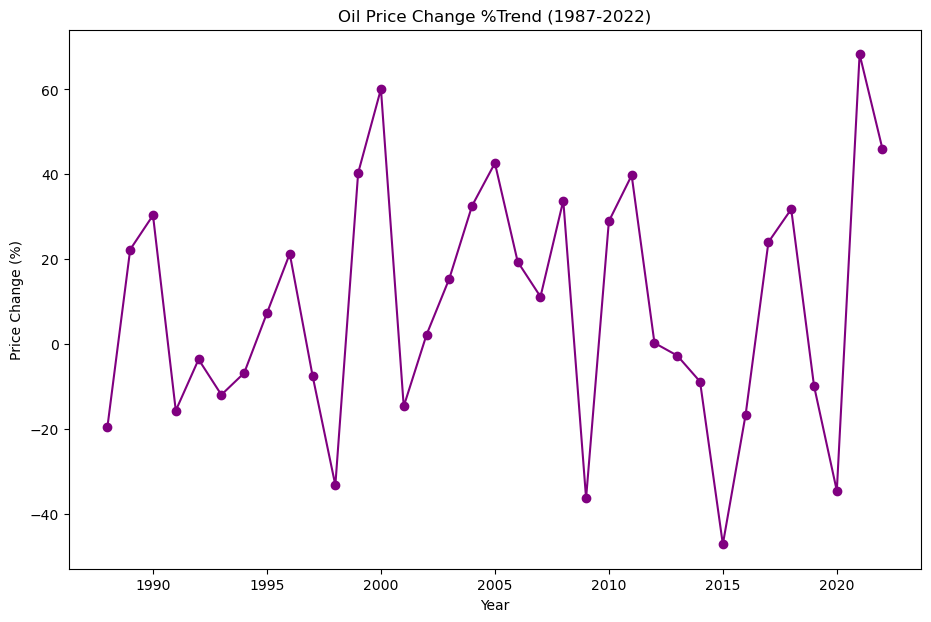

In [301]:
plt.figure(figsize=(11,7))
plt.xlabel("Year")
plt.ylabel("Price Change (%)")
plt.title("Oil Price Change %Trend (1987-2022)")
plt.plot(df1['Year'],df1['Price_Changepct'],marker='o',color='purple')
plt.savefig("Oil_Pct_Price_Change_Trend (1987-2022).png",format='png',dpi=300,bbox_inches='tight')
plt.show()

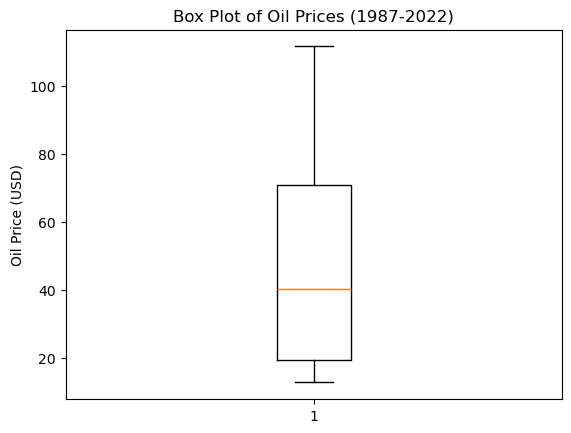

In [303]:
plt.boxplot(Df_flt['Price'])
plt.title('Box Plot of Oil Prices (1987-2022)')
plt.ylabel("Oil Price (USD)")
plt.savefig("Box_Plot_of_Oil_Prices_(1987-2022).png",format='png',dpi=300,bbox_inches='tight')
plt.show()


In [305]:
Df_flt= df1[(df1['Year']>1986) & (df1['Year']<2023)]
Df_flt['Price'].median()

40.18035455579502